<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB
None
*****************************************
         population   fertility         HIV         CO2    BMI_male  \
count  1.390000e+02  139.000000  139.000000  139.000000  139.000000   
mean   3.549977e+07    3.005108    1.915612    4.459874   24.623054   
std    1.095121e+08    1.615354    4.408974    6.268349    2.209368   
min    2.773150e+05    1.280000    0.060000    0.008618   20.397420   
25%    3.752776e+06    1.810000    0.1000

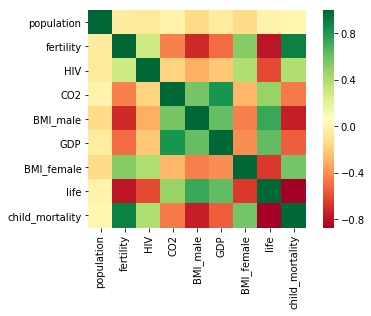

0.729898736091
[ 0.54471791  0.75586083  0.83921958  0.6900756   0.33991801  0.53042913
  0.44784016  0.66619475  0.4439451   0.62573667]


C:\Users\DavidH\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\DavidH\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


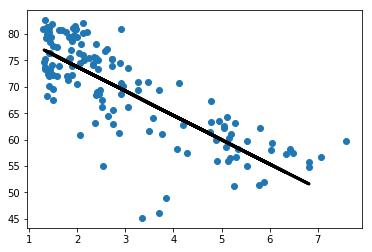

In [8]:
#import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Read the CSV file into a DataFrame
df = pd.read_csv('gm_2008_region.csv')

#Exploring the dataset
print(df.info()) #df information
print('*****************************************')
print(df.describe()) #df statistic summary
print('*****************************************')
print(df.head())#first 5 elements

#Use heatmap to find correlated column with life: fertility
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

#Define X, y
y = df['life']
X = df['fertility']

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

#Use Train_test split to split 30% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#Create the model
reg = LinearRegression()

#Fit the model to the data
reg.fit(X_train, y_train)

#Predict on test set
y_pred = reg.predict(X_test)

#Print R^2 
print(reg.score(X_test, y_test))

#Cross validation
cvscores = cross_val_score(reg, X, y, cv=10)
print(cvscores)

#Scatter plot shows negative correlation and the regression line
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.show()